In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
%matplotlib inline
import numbers
import ctypes
import _pickle as cPickle
import pydicom as dicom

import cv2
import os
import time
import PIL
import re
import math
import sys
#import pylab

import SimpleITK as sitk
from PIL import Image
from scipy import linalg

print ('OpenCV version = ' + cv2.__version__)
print("Using PyTorch Version %s" %torch.__version__)

OpenCV version = 3.4.2
Using PyTorch Version 1.3.1


In [2]:
dataDir = "/user/iibi/skuanar/Downloads/featExtract1.6/featExtract1.6/ShibaNew/H-18151/"
image = sitk.ReadImage ( dataDir + "H-18151_V2_INSP.nii" )

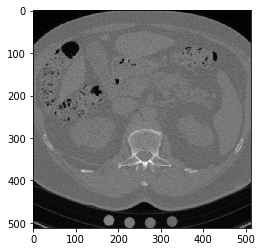

In [3]:
z = 0
slice = sitk.GetArrayFromImage(image)[z,:,:]
plt.imshow(slice, cmap='gray')

# Convert to 0 and 1, if you can't see it, check window/level!

Text(0.5, 1.0, 'WhiteDots')

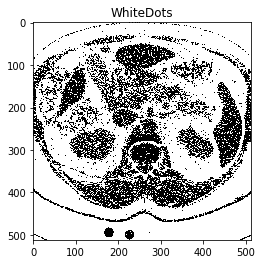

In [5]:
binary_Threshold_image = sitk.BinaryThreshold ( image, 0, 256, 0, 1 )

z = 0
slice = sitk.GetArrayFromImage(binary_Threshold_image)[z,:,:]
plt.imshow(slice, cmap='gray')
plt.title("WhiteDots")

# Erode, not to exciting, did something happen?

Text(0.5, 1.0, 'Binary Erode image')

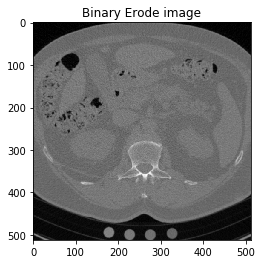

In [7]:
# Erode, not to exciting, did something happen?
BinaryErode_image = sitk.BinaryErode(image)

z = 0
slice = sitk.GetArrayFromImage(BinaryErode_image)[z,:,:]
plt.imshow(slice, cmap='gray')
plt.title("Binary Erode image")

Text(0.5, 1.0, 'Binary Erode image')

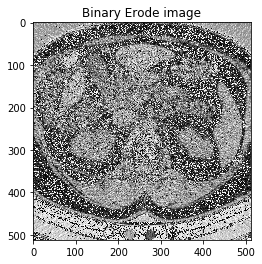

In [11]:
# visualize better?  Zoom in to see...
# Use pixel-wise operators

BinaryErode_image = 127 * image + 127 * sitk.BinaryErode(image)

z = 0
slice = sitk.GetArrayFromImage(BinaryErode_image)[z,:,:]
plt.imshow(slice, cmap='gray')
plt.title("ThinbErosion image")

Text(0.5, 1.0, 'Thick Erosion')

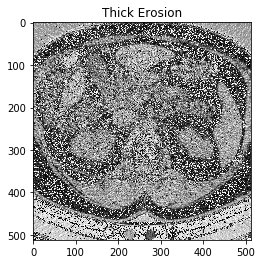

In [17]:
# Bigger kernel
filter = sitk.BinaryErodeImageFilter()
filter.SetKernelRadius(5)
eroded = filter.Execute (image)


final_image = (127 * image + 127 * eroded)

z = 0
slice = sitk.GetArrayFromImage(final_image)[z,:,:]
plt.imshow(slice, cmap='gray')
plt.title("Thick Erosion Image + SetKernelRadius ")

Text(0.5, 1.0, 'Thick Erosion')

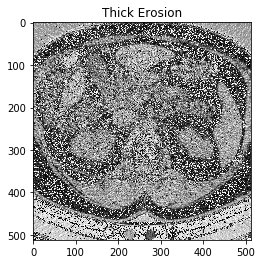

In [25]:
# Bigger kernel
filter = sitk.BinaryErodeImageFilter()
filter.SetKernelRadius(5)
filter.SetForegroundValue(1)
eroded = filter.Execute (image)


final_image_1 = (127 * image + 127 * eroded)

z = 0
slice = sitk.GetArrayFromImage(final_image_1)[z,:,:]
plt.imshow(slice, cmap='gray')
plt.title("Thick Erosion Image + SetForegroundValue ")

# Bigger kernal with a cross

Text(0.5, 1.0, 'CrossErosion')

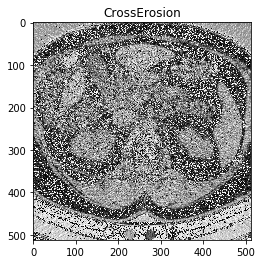

In [26]:
# Bigger kernal with a cross
filter.SetKernelType(sitk.BinaryErodeImageFilter.Cross )
eroded = filter.Execute(image)

eroded_image_1 = (127 * image + 127 * eroded)

z = 0
slice = sitk.GetArrayFromImage(eroded_image_1)[z,:,:]
plt.imshow(slice, cmap='gray')
plt.title("CrossErosion")

# Dilate

Text(0.5, 1.0, 'dilated image')

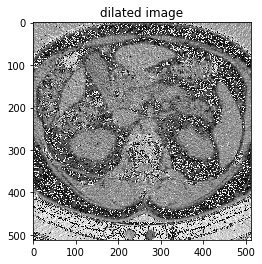

In [4]:
filter = sitk.BinaryDilateImageFilter()
filter.SetKernelRadius(5)
filter.SetForegroundValue(1)
dilated = filter.Execute (image)
dilated_image = (127 * (image + dilated))

z = 0
slice = sitk.GetArrayFromImage(dilated_image)[z,:,:]
plt.imshow(slice, cmap='gray')
plt.title("dilated image")

# Grayscale

Text(0.5, 1.0, 'GrayscaleDilate image')

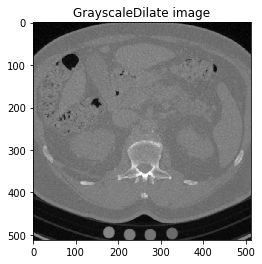

In [6]:
# Grayscale
GrayscaleDilate_image = sitk.GrayscaleDilate(image)

z = 0
slice = sitk.GetArrayFromImage(GrayscaleDilate_image)[z,:,:]
plt.imshow(slice, cmap='gray')
plt.title("GrayscaleDilate image")
#sitk.Show ( head - sitk.GrayscaleDilate ( head ), "GrayscaleDilate Difference" )

Text(0.5, 1.0, 'Grayscale Dilate Difference image')

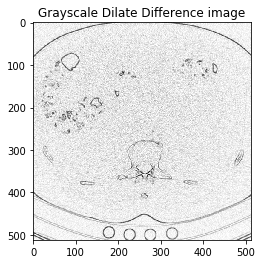

In [7]:
# Grayscale
GrayscaleDilate_Difference_image = (image - sitk.GrayscaleDilate(image))
z = 0
slice = sitk.GetArrayFromImage(GrayscaleDilate_Difference_image)[z,:,:]
plt.imshow(slice, cmap='gray')
plt.title("Grayscale Dilate Difference image")